In [164]:
#This Jupyter Notebook is meant to serve as a reference as you work through 
#the Pandas workshop curriculum within your own Jupyter Notebook
#If you ever feel stuck or can’t seem to be able to advance in the workshop, 
#you can open this file and see how we did it. 

In [165]:
#import the Pandas library into our Jupyter Notebook
import pandas as pd

In [166]:
#set the display settings to include 100 rows
pd.options.display.max_rows = 100

In [167]:
#use the method pd.read_csv() and insert the name of our desired file path to read in a CSV
refugee_df = pd.read_csv('refugee-arrivals-by-destination.csv', delimiter=",", encoding='utf-8')

In [168]:
#display the DataFrame
refugee_df

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0
2,2007,Afghanistan,Alabama,Mobile,0
3,2008,Afghanistan,Alabama,Mobile,0
4,2009,Afghanistan,Alabama,Mobile,5
...,...,...,...,...,...
121240,2011,Vietnam,Wisconsin,Milwaukee,0
121241,2012,Vietnam,Wisconsin,Milwaukee,4
121242,2013,Vietnam,Wisconsin,Milwaukee,2
121243,2014,Vietnam,Wisconsin,Milwaukee,0


In [169]:
#display the first n rows of the DataFrame 
refugee_df.head(2)

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0


In [170]:
refugee_df.head(15)

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0
2,2007,Afghanistan,Alabama,Mobile,0
3,2008,Afghanistan,Alabama,Mobile,0
4,2009,Afghanistan,Alabama,Mobile,5
5,2010,Afghanistan,Alabama,Mobile,8
6,2011,Afghanistan,Alabama,Mobile,5
7,2012,Afghanistan,Alabama,Mobile,7
8,2013,Afghanistan,Alabama,Mobile,9
9,2014,Afghanistan,Alabama,Mobile,1


In [171]:
#look at a random sample of 15 rows of data 
refugee_df.sample(15)

,year,origin,dest_state,dest_city,arrivals
39272,2015,Rwanda,Illinois,Romeoville,0
96850,2008,Burma,South Carolina,Greenville,6
33959,2015,Vietnam,Georgia,Jonesboro,0
100565,2005,Burma,Texas,Austin,2
50036,2010,Liberia,Maryland,New Carrollton,0
34189,2014,Burma,Hawaii,Mililani,4
5432,2011,Burma,California,Parlier,0
107087,2015,Burma,Utah,Heber City,0
87471,2012,Palestine,Ohio,Cincinnati,0
19638,2005,Eritrea,Colorado,Aurora,1


In [172]:
#get information about the columns in the DataFrame
refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121245 entries, 0 to 121244
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        121245 non-null  int64 
 1   origin      121245 non-null  object
 2   dest_state  121245 non-null  object
 3   dest_city   121245 non-null  object
 4   arrivals    121245 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


In [173]:
#it looks as though the data type for the year column is a “int64” instead of being “datetime64.”
#we want to conver our data from “int64” to “datetime64.”
#first, define a new variable for the year columns in “refugee_df” DataFrame
refugee_int = refugee_df['year']

In [174]:
#Next, we can run the command below to convert the data type from “int64” to “datetime64”
refugee_df['year'] = pd.to_datetime(refugee_int, format='%Y')

In [175]:
#check to see if the data type was properly converted
refugee_df.dtypes

year          datetime64[ns]
origin                object
dest_state            object
dest_city             object
arrivals               int64
dtype: object

In [176]:
#Check for duplicate rows
refugee_df[refugee_df.duplicated(keep=False)]

,year,origin,dest_state,dest_city,arrivals
13,2007-01-01,Burma,Alabama,Auburn,0
14,2008-01-01,Burma,Alabama,Auburn,0
15,2009-01-01,Burma,Alabama,Auburn,0
16,2010-01-01,Burma,Alabama,Auburn,0
17,2007-01-01,Burma,Alabama,Auburn,0
18,2008-01-01,Burma,Alabama,Auburn,0
19,2009-01-01,Burma,Alabama,Auburn,0
20,2010-01-01,Burma,Alabama,Auburn,0
155,2013-01-01,Cuba,Alabama,Russellville,0
156,2014-01-01,Cuba,Alabama,Russellville,0


In [177]:
#remove duplicate rows
refugee_df = refugee_df.drop_duplicates(keep='first')

In [178]:
#check to see if removal of duplicate rows was successful 
refugee_df[refugee_df.duplicated(keep=False)]

,year,origin,dest_state,dest_city,arrivals


In [179]:
#calculate the summary statistics for the columns in our DataFrame
refugee_df.describe()

,arrivals
count,121231.000000
mean,5.547409
std,36.049856
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2813.000000


In [180]:
#To include all columns in our summary statistics, we can add “include=‘all’”. 
#We also want to specify datetime_is_numeric=True to treat the datetime values as numeric.

refugee_df.describe(include='all', datetime_is_numeric=True)

,year,origin,dest_state,dest_city,arrivals
count,121231,121231,121231,121231,121231.000000
unique,NaN,113,52,2850,NaN
top,NaN,Iraq,California,Denver,NaN
freq,NaN,18205,15444,605,NaN
mean,2009-12-31 21:49:05.454545664,NaN,NaN,NaN,5.547409
min,2005-01-01 00:00:00,NaN,NaN,NaN,0.000000
25%,2007-01-01 00:00:00,NaN,NaN,NaN,0.000000
50%,2010-01-01 00:00:00,NaN,NaN,NaN,0.000000
75%,2013-01-01 00:00:00,NaN,NaN,NaN,1.000000
max,2015-01-01 00:00:00,NaN,NaN,NaN,2813.000000


In [181]:
#see a full list of the columns in our DataFrame
refugee_df.columns

Index(['year', 'origin', 'dest_state', 'dest_city', 'arrivals'], dtype='object')

In [182]:
#Rename columns
refugee_df=refugee_df.rename(columns={'dest_state': 'state','dest_city':'city' })

In [183]:
#Select columns
refugee_df[['state']]

,state
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama
...,...
121240,Wisconsin
121241,Wisconsin
121242,Wisconsin
121243,Wisconsin


In [184]:
#select multiple columns
refugee_df[['state','city']]

,state,city
0,Alabama,Mobile
1,Alabama,Mobile
2,Alabama,Mobile
3,Alabama,Mobile
4,Alabama,Mobile
...,...,...
121240,Wisconsin,Milwaukee
121241,Wisconsin,Milwaukee
121242,Wisconsin,Milwaukee
121243,Wisconsin,Milwaukee


In [185]:
#Drop columns and save as a new DataFrame
refugee_drop_df = refugee_df.drop(columns="city")
refugee_drop_df

,year,origin,state,arrivals
0,2005-01-01,Afghanistan,Alabama,0
1,2006-01-01,Afghanistan,Alabama,0
2,2007-01-01,Afghanistan,Alabama,0
3,2008-01-01,Afghanistan,Alabama,0
4,2009-01-01,Afghanistan,Alabama,5
...,...,...,...,...
121240,2011-01-01,Vietnam,Wisconsin,0
121241,2012-01-01,Vietnam,Wisconsin,4
121242,2013-01-01,Vietnam,Wisconsin,2
121243,2014-01-01,Vietnam,Wisconsin,0


In [186]:
#Add columns
#You can read the command as: create a new column that calculates the number of arrivals in a row divided 
#by the total number of arrivals in the dataset, times 100. 
#The result of this calculation will equal the percentage of total refugee arrivals for each row.

refugee_df['percent_total'] = (refugee_df['arrivals'] / refugee_df['arrivals'].sum())*100
refugee_df.sample(15)

,year,origin,state,city,arrivals,percent_total
118890,2015-01-01,Ukraine,Washington,Pacific,0,0.000000
111849,2014-01-01,Kyrgyzstan,Virginia,Fairfax,0,0.000000
52216,2012-01-01,China,Massachusetts,Lexington,0,0.000000
87910,2011-01-01,Somalia,Ohio,Cleveland Heights,0,0.000000
83107,2015-01-01,Kuwait,North Carolina,Charlotte,0,0.000000
77783,2015-01-01,Iraq,New York,Victor,0,0.000000
6390,2012-01-01,Cuba,California,Diamond Bar,0,0.000000
102650,2011-01-01,Eritrea,Texas,Mesquite,0,0.000000
23982,2015-01-01,Burma,Florida,Delray Beach,17,0.002528
66060,2007-01-01,Eritrea,Missouri,Jefferson City,0,0.000000


In [187]:
#Sort columns
#To sort a DataFrame, we can use the .sort_values() method with the parameter by= 
#and including the name of the column we want to sort by written in quotation marks. 
refugee_df.sort_values(by='percent_total', ascending=False)[:15]

,year,origin,state,city,arrivals,percent_total
11359,2009-01-01,Iraq,California,El Cajon,2813,0.418279
8718,2008-01-01,Iran,California,Glendale,2025,0.301107
11360,2010-01-01,Iraq,California,El Cajon,1811,0.269286
8719,2009-01-01,Iran,California,Glendale,1722,0.256053
58761,2012-01-01,Iraq,Michigan,Southfield,1720,0.255755
11362,2012-01-01,Iraq,California,El Cajon,1698,0.252484
8717,2007-01-01,Iran,California,Glendale,1637,0.243414
64090,2006-01-01,Somalia,Minnesota,Minneapolis,1586,0.235830
11358,2008-01-01,Iraq,California,El Cajon,1569,0.233302
25699,2005-01-01,Cuba,Florida,Miami,1537,0.228544


In [188]:
#Groupby Columns
#We can group data and perform calculations on the groups using the .groupby() method. 

refugee_df.groupby('origin')

In [189]:
#This command created a Groupby object—grouped data—that we can use to perform calculations 
#such as counting the number of non-blank values in each column for each arrival by country of origin.

In [190]:
#We can count the number of refugee arrivals by country of origin, 
#with the output showing the top twenty rows sorted by descending order
refugee_df.groupby('origin')['arrivals'].count().sort_values(ascending=False)[:20]

origin
Iraq               18205
Iran               10186
Burma               9196
Cuba                6655
Vietnam             5533
Ukraine             5258
Russia              4972
Somalia             4884
Liberia             4037
Eritrea             3960
Sudan               3333
Ethiopia            3311
Afghanistan         3102
Bhutan              2948
Dem. Rep. Congo     2882
Sierra Leone        2046
Moldova             1991
Belarus             1727
Syria               1661
Burundi             1485
Name: arrivals, dtype: int64

In [191]:
#count the number of unique values in a column by using the .value_counts() method
refugee_df['state'].value_counts()

California              15444
New York                 7073
Texas                    6853
Washington               5830
Florida                  5797
Massachusetts            5291
Illinois                 5247
Pennsylvania             5082
Minnesota                4796
Virginia                 4774
Georgia                  4752
Maryland                 4466
New Jersey               4213
Michigan                 3839
North Carolina           3696
Ohio                     3619
Colorado                 2420
Arizona                  2376
Tennessee                2156
Connecticut              1870
Missouri                 1804
Oregon                   1617
Wisconsin                1573
Utah                     1386
Kentucky                 1309
Indiana                  1254
Louisiana                1199
Iowa                     1122
Kansas                   1045
South Carolina            847
Idaho                     814
Nebraska                  781
Oklahoma                  726
New Hampsh

In [192]:
#Wyoming is missing from the list above, which can be confirmed by filtering the DataFrame 
#to select only certain values:

refugee_df[refugee_df['state'] == 'Wyoming']

,year,origin,state,city,arrivals,percent_total


<AxesSubplot:title={'center':'Total number of refugee arrivals in the U.S. \n by country of origin'}, xlabel='origin'>

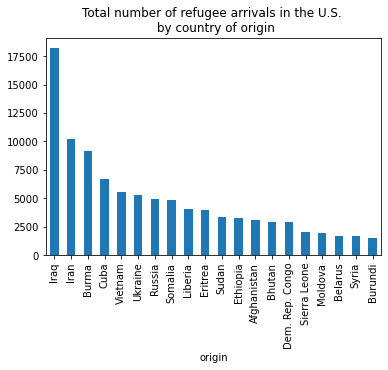

In [193]:
#To create plots and data visualization in Pandas, 
#we can add the .plot() method to any DataFrame or Series object that has appropriate numeric data.

#we can visualize the data we got from our Groupby command looking 
#at the total number of refugees by country of arrival as a bar chart

refugee_df.groupby('origin')['arrivals'].count().sort_values(ascending=False)[:20].plot(kind='bar', title='Total number of refugee arrivals in the U.S. \n by country of origin')

<AxesSubplot:title={'center':'Total number of refugee arrivals in the U.S. \n by country of origin'}, ylabel='arrivals'>

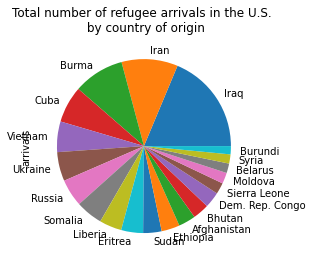

In [194]:
#We can also visualize the data as a pie chart
refugee_df.groupby('origin')['arrivals'].count().sort_values(ascending=False)[:20].plot(kind='pie', title='Total number of refugee arrivals in the U.S. \n by country of origin')

In [195]:
#We can also create time series using the Groupby method.

#if we wanted to visualize the total number of refugees resettled in the U.S. across the 2005-2015 period, 
#we would first create a Groupby object based on the “year” column

refugee_df.groupby('year')

In [196]:
#create a new variable calculating the average number of refugees being resettled over time
total_arrivals_by_year = refugee_df.groupby('year')['arrivals'].sum()

<AxesSubplot:title={'center':'Total Number of Refugee Arrivals in the U.S. by Year'}, xlabel='year'>

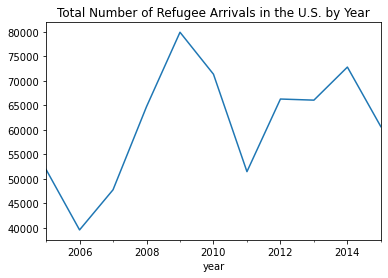

In [197]:
#add the .plot() method to create a line chart
total_arrivals_by_year.plot(kind='line', title="Total Number of Refugee Arrivals in the U.S. by Year")

In [198]:
#To output a new CSV file, use the .to_csv method with a name for the file in quotation marks

refugee_df.to_csv("new_refugee.csv", encoding='utf-8', index=False)